## Creating a Word2Vec model from Scratch

In [1]:
# importing all the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
# for this we are using a samll dataset of 14 sentences
sentences = ['cat chases mice',
	     'cat chases mice',
	     'cat eat mice',
	     'mice run into hole',
	     'cat say bad word to mice',
	     'cat and mice are chums',
	     'mice are afraid of cat',
	     'mice store food in hole',
	     'cat store food in house',
	     'mice sleep in hole',
	     'cat sleep in house',
	     'cat and mice are friends',
	     'mice live in hole',
	     'cat live in house',
	     'cat and mice are enemies',]

In [25]:
# We will create a vocabulary of all the words in the sentences
# In this function we are returning the vocab size, word2idx and idx2word
# word2idx is a dictionary where the word is the key and the index is the value
# idx2word is a dictionary where the index is the key and the word is the value
# vocab_size is the total number of unique words in the sentences
def get_vocab(sentences):
     i = 1
     word2idx = dict()
     idx2word = dict()
     temp = set()
     for sentence in sentences:
        for word in sentence.split():
            if word not in temp:
                temp.add(word)
                word2idx[word] = i
                idx2word[i] = word
                i+=1
     return i,word2idx, idx2word

vocb_size, word2idx, idx2word = get_vocab(sentences)


In [26]:
vocb_size

25

In [50]:
#  In this function we are returning the previous words of the current word
#  It is a n gram model where we are taking the previous n words and the next n words
#  We are padding the words with 0 if the index is out of range
#  We are returning the index of the words
#  We are using sliding window algorithm
# We are taking the previous n words and the next n words
def prev_words(i,doc,window_size):
	out = []
	for index in range(i-window_size,i):
		if index >= 0:
			out.append(word2idx[doc[index]])
		else:
			out.append(0)
	return out
def next_words(i,doc,window_size):
	out = []
	for index in range(i+1,i+window_size+1,1):
		if index < len(doc):
			out.append(word2idx[doc[index]])
		else:
			out.append(0)
	return out

def get_training_data(sentences,window_size = 6):
	X = []
	y = []

	for sentence in sentences:
		xi = []
		yi = []
		sentence = sentence.split()
		for index, word in enumerate(sentence):
			prev = prev_words(index,sentence,window_size//2)
			next = next_words(index,sentence,window_size//2)
			assert len(prev) == len(next)
			xi.append(prev+next)
			yi.append([word2idx[word]])
		X.extend(xi)
		y.extend(yi)
	return X,y


# X is the input and y is the output
# X is the previous words and the next words
# y is the current word
X,y = get_training_data(sentences,window_size = 5)


In [52]:
X[27]

[13, 15, 1, 0]

In [53]:
len(X)

65

In [54]:
# using tensorflow to create a model for creating a word embedding nural network model
model = tf.keras.Sequential()

# Size of our embeddings vector is 3 
embed_size = 3

model.add(tf.keras.layers.Embedding(vocb_size, embed_size, input_length=4))


model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(vocb_size, activation='softmax'))

In [55]:
# Compiling the model
#-----------------------
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [78]:
# fitting the model
model.fit(X,y,epochs=200, batch_size=6) # batch size is 6 and epochs is 200 we can use any size

Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0382 - accuracy: 0.6615
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0371 - accuracy: 0.6615
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0357 - accuracy: 0.6615
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0347 - accuracy: 0.6615
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 1.0337 - accuracy: 0.6615
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0324 - accuracy: 0.6615
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0310 - accuracy: 0.6615
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0302 - accuracy: 0.6615
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0288 - accuracy: 0.6615
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0281 - accuracy: 0.6615
Epoch 11/

In [80]:
# Getting the weights of the model (embedding of each word)
word2vec = []
for  word,word_index in word2idx.items():
	input_vec = (tf.convert_to_tensor([word2idx[word]]))
	embed = model.get_layer('embedding')(input_vec).numpy().tolist()[0]
	word2vec.append((word, embed))

In [81]:
word2vec

[('cat', [-2.714733362197876, -0.2710416316986084, 1.810164451599121]),
 ('chases', [1.326700210571289, 2.728817939758301, -3.758286237716675]),
 ('mice', [0.8936411142349243, -0.9905452132225037, 4.153246879577637]),
 ('eat', [1.1058679819107056, 2.3625576496124268, -3.008415460586548]),
 ('run', [-2.667862892150879, -0.5223708748817444, -0.29444676637649536]),
 ('into', [-2.7725887298583984, -1.3604357242584229, -1.347503423690796]),
 ('hole', [0.8270264267921448, -4.133701324462891, 0.656247615814209]),
 ('say', [0.6958246231079102, -1.7210309505462646, 0.8924477100372314]),
 ('bad', [3.498091697692871, 1.5502216815948486, 2.1456050872802734]),
 ('word', [-0.7130860686302185, 0.6111092567443848, 2.011228084564209]),
 ('to', [-2.8167929649353027, -0.6801324486732483, 0.5632443428039551]),
 ('and', [3.241790533065796, 4.949970722198486, -2.2185165882110596]),
 ('are', [-4.970917701721191, 3.0781044960021973, 1.7791919708251953]),
 ('chums', [0.5473597645759583, 3.537548780441284, -0.4

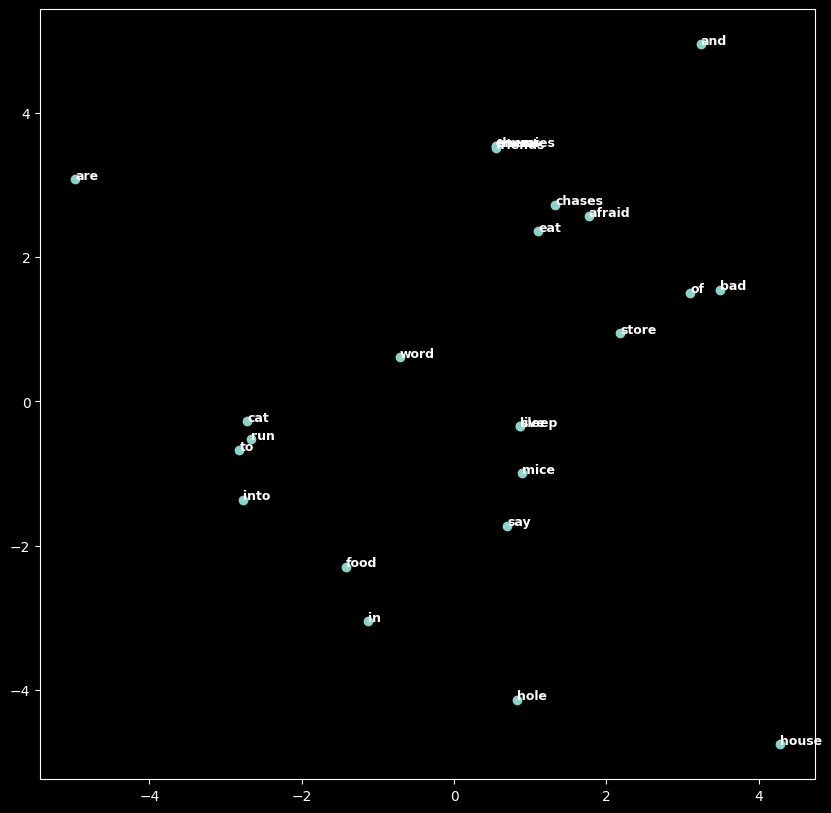

In [82]:
# Try to plot the word embeddings in 2D space
plt.figure(figsize=(10,10))
plt.scatter([i[1][0] for i in word2vec],[i[1][1] for i in word2vec])
for i in word2vec:
	word = i[0]
	plt.text(i[1][0],i[1][1],word, fontdict={'weight': 'bold', 'size': 9})
plt.show()

## Now after creating it from scratch, we try it with the inbuild library and Data we use in it is Part 1 of Harry Potter Novel

## Using Gensim

- dataset_link = 'https://github.com/ChiragB254/Word2Vec/blob/f29235909f71d2e738f3e4116d0456baab7c94cc/harry.txt'

In [ ]:
! pip install gensim

In [103]:
# Importing all the important libraries
import gensim
import os
from nltk import sent_tokenize
from gensim.utils import simple_preprocess


In [ ]:
import nltk
nltk.download('punkt')

In [118]:
# We are reading all the files in the directory and creating a corpus of all the words using gensim's simple preprocess function
story = []
for filename in os.listdir():
    
    f = open(os.path.join(filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [119]:
story

[['harry',
  'potter',
  'and',
  'the',
  'sorcerer',
  'stone',
  'chapter',
  'one',
  'the',
  'boy',
  'who',
  'lived',
  'mr',
  'and',
  'mrs',
  'dursley',
  'of',
  'number',
  'four',
  'privet',
  'drive',
  'were',
  'proud',
  'to',
  'say',
  'that',
  'they',
  'were',
  'perfectly',
  'normal',
  'thank',
  'you',
  'very',
  'much'],
 ['they',
  'were',
  'the',
  'last',
  'people',
  'you',
  'expect',
  'to',
  'be',
  'involved',
  'in',
  'anything',
  'strange',
  'or',
  'mysterious',
  'because',
  'they',
  'just',
  'didn',
  'hold',
  'with',
  'such',
  'nonsense'],
 ['mr',
  'dursley',
  'was',
  'the',
  'director',
  'of',
  'firm',
  'called',
  'grunnings',
  'which',
  'made',
  'drills'],
 ['he',
  'was',
  'big',
  'beefy',
  'man',
  'with',
  'hardly',
  'any',
  'neck',
  'although',
  'he',
  'did',
  'have',
  'very',
  'large',
  'mustache'],
 ['mrs',
  'dursley',
  'was',
  'thin',
  'and',
  'blonde',
  'and',
  'had',
  'nearly',
  'twice'

In [120]:
# Creating an instance of the word2vec model having window size of 10 (10 words before and 10 after the target word)
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [121]:
# Build the vocabulary
model.build_vocab(story)

In [122]:
# Trainning the model
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(600690, 786560)

In [123]:
# Getting weights of the most similar words to the word 'harry'
model.wv.most_similar('harry')

[('quickly', 0.9951912760734558),
 ('nharry', 0.9951831102371216),
 ('her', 0.9944929480552673),
 ('furiously', 0.9944220185279846),
 ('though', 0.9941504597663879),
 ('felt', 0.9938081502914429),
 ('suddenly', 0.993760347366333),
 ('spoke', 0.9933959245681763),
 ('moment', 0.9933639168739319),
 ('shut', 0.9932503700256348)]

In [126]:
# Storing all the target words in the y
y = model.wv.index_to_key

In [127]:
y

['the',
 'and',
 'to',
 'he',
 'of',
 'harry',
 'was',
 'it',
 'you',
 'in',
 'his',
 'said',
 'had',
 'that',
 'they',
 'on',
 'at',
 'as',
 'him',
 'but',
 'ron',
 'with',
 'all',
 'what',
 'out',
 'be',
 'up',
 'for',
 'hagrid',
 'them',
 'were',
 'have',
 'there',
 'we',
 'back',
 'one',
 'hermione',
 'if',
 'this',
 'she',
 'not',
 'from',
 'so',
 'an',
 'about',
 'me',
 'into',
 'know',
 'their',
 'been',
 'off',
 'no',
 'who',
 'got',
 'could',
 'get',
 'didn',
 'like',
 've',
 'see',
 'her',
 'down',
 'is',
 'just',
 'do',
 'don',
 'professor',
 'very',
 'over',
 'looked',
 'now',
 'll',
 'when',
 'snape',
 'are',
 'then',
 'by',
 'can',
 'your',
 'dumbledore',
 'nharry',
 're',
 'nthe',
 'around',
 'how',
 'go',
 'going',
 'dudley',
 'never',
 'look',
 'right',
 'something',
 'time',
 'think',
 'through',
 'yeh',
 'vernon',
 'malfoy',
 'step',
 'well',
 'here',
 'uncle',
 'more',
 'first',
 'or',
 'neville',
 'only',
 'my',
 'looking',
 'would',
 'door',
 'even',
 'where',
 'l

In [128]:
# To plot it 3d Graph we are using PCA
from sklearn.decomposition import PCA

# We are using PCA to reduce the dimensionality of the word embeddings to 3
pca = PCA(n_components=3)

In [129]:
# Fitting the PCA model
X = pca.fit_transform(model.wv.get_normed_vectors())

In [130]:
# Checking the shape of the X
X.shape

(6594, 3)

In [131]:
# Plotting it in 3D
import plotly.express as px
fig = px.scatter_3d(X[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()

## Thank you, For checking it out!
-   [Email](mailto:devchirag27@gmail.com)
-   [LinkedIn](https://linkedin.com/in/chiragb254)